#Comparing the classification accuracy of Naive Bayes with that of Gradient Boosting

In [1]:
#Libraries Used
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("/Users/shubh/Desktop/Completed Courses/Predictive Analytics/Week 5/santander-customer-transaction-prediction/train.csv")

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test = pd.read_csv("/Users/shubh/Desktop/Completed Courses/Predictive Analytics/Week 5/santander-customer-transaction-prediction/test.csv")

In [5]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
#Checking for Null Values
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

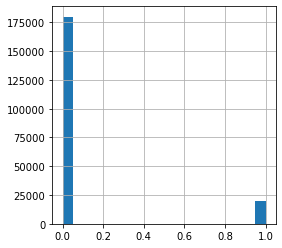

In [7]:
train['target'].hist(figsize=(4, 4), bins='auto');

In [8]:
#Converting Pandas dataframe to Numpy array and separating the labels from the features  
X=np.asarray(train.iloc[1:,2:])
y=np.asarray(train.iloc[1:,1])
test_x=np.asarray(test.iloc[1:,1:])

#NAIVE BAYES ALGO 

In [9]:
prediction = pd.DataFrame()
clf = GaussianNB()
clf.fit(X, y)
prediction = clf.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [10]:
clf_pf = GaussianNB()
clf_pf.partial_fit(X, y, np.unique(y))
partial_prediction=clf_pf.predict(test_x)
print(partial_prediction)

[0 0 0 ... 0 0 0]


In [12]:
#prediction

pre = pd.DataFrame(data=prediction, columns=['target'])

prediction_NB = pd.DataFrame()
prediction_NB['ID_code'] = test['ID_code']
prediction_NB['target'] = pre['target']
print(prediction_NB.head())
expot_Predict_NB= prediction_NB.to_csv("/Users/shubh/Desktop/Completed Courses/Predictive Analytics/Week 5/export_predict_NB.csv",index=None, header=True)

  ID_code  target
0  test_0     0.0
1  test_1     0.0
2  test_2     0.0
3  test_3     0.0
4  test_4     0.0


#Gradient Boosting

In [14]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X, y)
GBprediction=gb_clf.predict(test_x)

preGB = pd.DataFrame(data=GBprediction, columns=['target'])

prediction_GB = pd.DataFrame()
prediction_GB['ID_code'] = test['ID_code']
prediction_GB['target'] = pre['target']
print(prediction_GB.head())
expot_Predict_GB= prediction_GB.to_csv("/Users/shubh/Desktop/Completed Courses/Predictive Analytics/Week 5/export_predict_GB.csv",index=None, header=True)

  ID_code  target
0  test_0     0.0
1  test_1     0.0
2  test_2     0.0
3  test_3     0.0
4  test_4     0.0
